# Space and Time

## 1-D Diffusion

$$ \begin{equation}
\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}
\end{equation} $$

where $\nu$ is a constant known as the *diffusion coefficient*.

## Discretization of 2nd - Order Derivatives

$$ u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u}{\partial x^2}\big|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4) $$

$$ u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u}{\partial x^2}\big|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4) $$

$$ u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\big|_i + {\mathcal O}(\Delta x^4) $$

So, 

$$ \begin{equation}
\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + {\mathcal O}(\Delta x^2)
\end{equation} $$

The central difference approximation of the 2nd-order derivative is 2nd-order accurate.

## Diffusion
Discretized version of the diffusion equation in 1D:

$$ \begin{equation}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}
\end{equation} $$
Rearranging,

$$
\begin{equation}
u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})
\end{equation}
$$

## Stability of the Diffusion Equation

The stability condition for the diffusion is
$$ \begin{equation}
\nu \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation} $$

______________________

In [1]:
import numpy as np
from matplotlib import pyplot as py
% matplotlib inline

# Font family and size to use for Matplotlib figures
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [2]:
# Parameters
nx = 41   # number of spatial grid points
L = 2.0   # length of the domain
dx = L/(nx-1)   # spatial grid size
nu = 0.3   # viscosity
sigma = 0.2   # CFL limit
dt = sigma * dx**2 / nu   # time - step size
nt = 20   # number of time steps to compute

# Grid Point Coordinates
x = np.linspace(0.0, L, num = nx)

# Initial Conditions
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

In [3]:
# Integrate in time
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + nu * dt/dx**2 * (u[2:] - 2 * u[1:-1] + u[:-2])

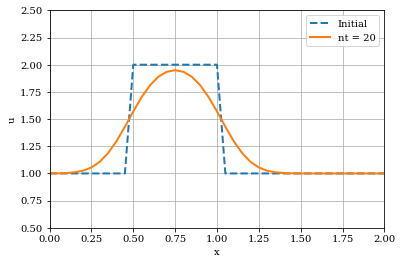

In [4]:
# Plot the solution after nt times steps
# along with the initial conditions.

py.figure(figsize = (6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u0, label = 'Initial', color = 'C0',
        linestyle = '--', linewidth = 2)
py.plot(x, u, label = 'nt = {}'.format(nt), color = 'C1',
         linestyle = '-', linewidth = 2)
py.legend(loc = 'upper right')
py.xlim(0.0, L)
py.ylim(0.5, 2.5);

## Animations

In [5]:
from matplotlib import animation
from IPython.display import HTML

In [6]:
'''
    Computes the numerical solution of the 1D diffusion
    equation over the time steps
    u0 : numpy.ndarray, initial conditions
            as a 1D array of floats
    sigma : float, optional, value of
            nu*dt/dx^2, default = 0.5
    nt : integer, optional, number of time
            steps to computer, default = 20
'''

def diff(u0, sigma = 0.5, nt = 20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist

In [7]:
# History of the numerical solution
u_hist = diff(u0, sigma = sigma, nt = nt)

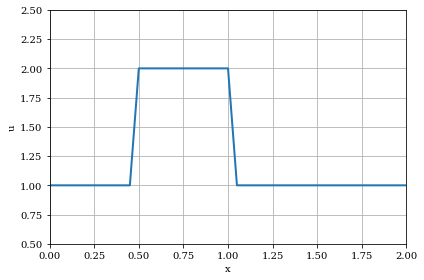

In [8]:
fig = py.figure(figsize = (6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
line = py.plot(x, u0, color = 'C0',
                   linestyle = '-', linewidth = 2)[0]
py.xlim(0.0, L)
py.ylim(0.5, 2.5)
fig.tight_layout()

In [9]:
'''
    Updates the line y-data of the Matplotlib figure
    n : integer, time-step index
    u_hist : list of numpy.ndarray objects, the history
                of the numerical solution
'''

def updateplot(n, u_hist):
    fig.suptitle('Time Step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

`animation.FuncAnimation` object with arguments:

* `fig`: the name of our figure,
* `diffusion`: the name of our solver function,
* `frames`: the number of frames to dra (which we set equal to `nt`),
* `fargs`: extra arguments to pass to the function `diffusion`,
* `interval`: the number of milliseconds each frame appears for.

In [10]:
# Create an animation
anime = animation.FuncAnimation(fig, updateplot, frames = nt, 
                        fargs = (u_hist,), interval = 100)

In [11]:
# Display the video
HTML(anime.to_html5_video())

ValueError: Invalid file object: <_io.BufferedReader name=62>